# Numerical modelling of Euler-Bernoulli beam
The effects of different applications of the same total mass are evaluated with a numerical approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import * #import ones and diags
from IPython.html.widgets import interact

D:\Programs\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Material parameters
E = 3*10**10       # Young's modulus
rho = 2400         # Material density
g = 9.8            # Gravitional acceleration
m = 100            # Mass
S = 10**4          # Cross-sectional area
L = 5.0            # Beam length
b = 0.04           # Beam width
d = 0.1            # Beam height
s = 1.0            # Step size

# Define Moment of Inertia   
def inertia(b,d):
    I = (1/12.)*b*d**3
    return I

I = inertia(b,d)  

# The deflection w that has to be calculated is the solution of the Matrix-equation: Aw = q
# In the following section matrix A will be defined, as well as vector q, consisting of qm (applied load) and qeig (own weight)

def matrix(L,h,E,I,S):
    N = int(L/h)
    #Determine Submatrix K
    C1 = (E*I)/(h**4)
    d0 = 6*np.ones(N-1)  # main diagonal
    d0[0] = 5  # first value of main diagonal is 1
    d0[-1] = 5 # last value of main diagonal is 1
    dplus1 = -4*ones(N-2) # diagonal right above main diagonal, position 1
    dmin1 = -4*ones(N-2)  # diagonal right below main diagonal, position -1
    dplus2 = ones(N-3) # diagonal above main diagonal, position 2
    dmin2 = ones(N-3)  # diagonal below main diagonal, position -2
    K = C1* (diag(d0,0) + diag(dplus1,1) + diag(dmin1,-1) + diag(dplus2,2) + diag(dmin2,-2))
    #Determine Submatrix M
    C2 = S/(h**2)
    d0 = -2*ones(N-1)  # main diagonal
    dplus1 = ones(N-2) # diagonal right above main diagonal, position 1
    dmin1 = ones(N-2)  # diagonal right below main diagonal, position -1
    M = C2*(diag(d0,0) + diag(dplus1,1) + diag(dmin1,-1))
    #Resulting A
    A = K+M
    return A

#Define vector q over Length of beam (qeig + qm)
#Vector q due to eigengewicht (qeig)
def qeig(rho,b,d,g,L,h):
    N = int(L/h)
    qeig = np.zeros(N-1)
    q = rho*b*d*g
    for i in range(len(qeig)):
        qeig[i] = q
    return qeig

# Vector q due to load (qm)
def qm(m,s,g,L,h):
    N = int(L/h)
    qm = np.zeros(N-1)
    x = np.linspace(h,L-h,N-1)
    for i in range(len(qm)):
        if x[i]<((L/2.)-(s/2.)):
            qm[i] = 0.0
        elif x[i]>((L/2.)+(s/2.)):
            qm[i] = 0.0
        elif x[i] == ((L/2.)-(s/2.)):
            qm[i] = (m/(2*s))*g
        elif x[i] == ((L/2.)+(s/2.)):
            qm[i] = (m/(2*s))*g
        else:
            qm[i] = (m/s)*g 
    return qm

# The deflection vector w is than calculated by solving Aw = q

def w(q,A):
    wmiddle = np.linalg.solve(A,q)
    w = np.zeros(len(wmiddle)+ 2)
    for i in range(len(wmiddle)):
        w[i+1] = wmiddle[i]
    return w



D:\Programs\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


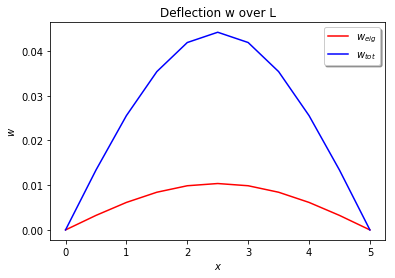

  h            w             
   0.0:     0.0000000e+00
   0.5:     1.3387772e-02
   1.0:     2.5563750e-02
   1.5:     3.5405234e-02
   2.0:     4.1906687e-02
   2.5:     4.4204872e-02
   3.0:     4.1906687e-02
   3.5:     3.5405234e-02
   4.0:     2.5563750e-02
   4.5:     1.3387772e-02
   5.0:     0.0000000e+00

The maximum deflection due to own weight attains a value of  0.01037435024811161
The maximum deflection due to total load attains a value of  0.044204872478085716


In [3]:
# Calculation of matrix A, vector q and vector w for h=0.5

h = 0.5
N = L/h
A = matrix(L,h,E,I,S)
q_eig = qeig(rho,b,d,g,L,h)
q_m = qm(m,s,g,L,h)
q_tot = q_eig + q_m
w_eig = w(q_eig,A)
w_tot = w(q_tot,A)

# Plot deflections for h=0.5
x_array = np.linspace(0.0,L,N+1)
plt.plot(x_array, w_eig, 'r', label = 'Deflection by own weight')
plt.plot(x_array, w_tot, 'b', label = 'Deflection by applied load')
plt.legend(("$w_{eig}$", "$w_{tot}$"),
           loc="upper right", shadow=True)
plt.xlabel("$x$")
plt.ylabel("$w$")
plt.title("Deflection w over L")
plt.show()

# Table of deflections by total load (qm + qeig) for h=0.5
table = "  h            w             \n"
for k in range(int(N+1)):
    table = table + "{:6.1f}: {:17.7e}\n".format(
        x_array[k],w_tot[k])
print (table)

print ("The maximum deflection due to own weight attains a value of ", max(w_eig))
print ("The maximum deflection due to total load attains a value of ", max(w_tot))


D:\Programs\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


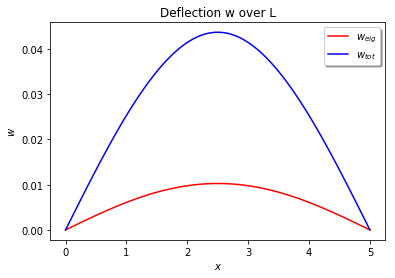

The maximum deflection due to own weight attains a value of  0.010263726714048991
The maximum deflection due to total load attains a value of  0.043704159607902006
Maximum load equals:  119.0
  mass     max deflection             
 115.0:     4.8720225e-02
 115.5:     4.8887427e-02
 116.0:     4.9054629e-02
 116.5:     4.9221831e-02
 117.0:     4.9389033e-02
 117.5:     4.9556235e-02
 118.0:     4.9723438e-02
 118.5:     4.9890640e-02
 119.0:     5.0057842e-02
 119.5:     5.0225044e-02
 120.0:     5.0392246e-02
 120.5:     5.0559448e-02
 121.0:     5.0726651e-02
 121.5:     5.0893853e-02
 122.0:     5.1061055e-02
 122.5:     5.1228257e-02
 123.0:     5.1395459e-02
 123.5:     5.1562661e-02
 124.0:     5.1729864e-02
 124.5:     5.1897066e-02




In [4]:
# Calculation of matrix A, vector q and vector w for h=0.05

h = 0.05
N = L/h
A = matrix(L,h,E,I,S)
q_eig = qeig(rho,b,d,g,L,h)
q_m = qm(m,s,g,L,h)
q_tot = q_eig + q_m
w_eig = w(q_eig,A)
w_tot = w(q_tot,A)

# Plot deflections for h=0.05
x_array = np.linspace(0.0,L,N+1)
plt.plot(x_array, w_eig, 'r', label = 'Deflection by own weight')
plt.plot(x_array, w_tot, 'b', label = 'Deflection by applied load')
plt.legend(("$w_{eig}$", "$w_{tot}$"),
           loc="upper right", shadow=True)
plt.xlabel("$x$")
plt.ylabel("$w$")
plt.title("Deflection w over L")
plt.show()

print ("The maximum deflection due to own weight attains a value of ", max(w_eig))
print ("The maximum deflection due to total load attains a value of ", max(w_tot))

def mass_defl_table(N):
    m = np.linspace(115,125,N+1)
    
    # create vector with maximum deflections for each value of mass
    y = np.zeros(len(m))
    for i in range(len(m)):
        q = qeig(rho,b,d,g,L,h)+qm(m[i],s,g,L,h)
        y[i] = max(w(q,A))
        
    # create vector for difference between maximum deflection and 0.05 (max allowable deflection)
    y1 = np.zeros(len(m))
    for i in range(len(y)):
        y1[i] = abs(y[i] - 0.05)
        
    # select mass for which the difference between max defl. and 0.05 is smallest
    for i in range(len(y)):
        if y1[i] == min(y1):
            print ("Maximum load equals: ",m[i])
            
    # create table for mass and deflection
    table = "  mass     max deflection             \n"
    for k in range(N):
        table = table + "{:6.1f}: {:17.7e}\n".format(
            m[k],y[k])
    print (table)
    return ""

print (mass_defl_table(20))

D:\Programs\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


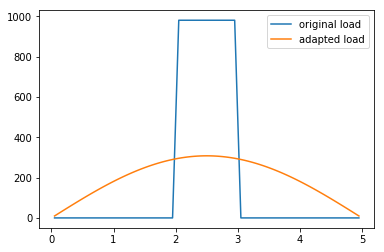

In [5]:
# Instead of the original load, the total applied load can be approximated by an adapted load

m = 100
x = np.linspace(h,L-h,N-1)
Am = (m*np.pi)/(2*L)
# Defining the adapted load
def qm2 (Am,g,x,L):
    q = Am *g*np.sin(np.pi*x/L)
    return q

# Printing both the original and the adapted load

plt.plot(x,qm(m,s,g,L,h), label = 'original load')
plt.plot(x,qm2(Am,g,x,L), label = 'adapted load')
plt.legend(loc=0)

D:\Programs\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
D:\Programs\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


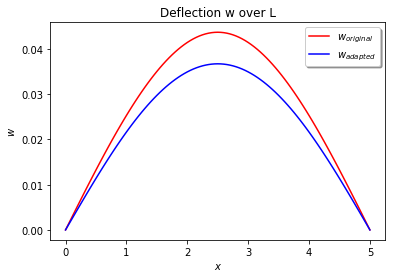

The maximum deflection due to original additional load attains a value of  0.043704159607902006
The maximum deflection due to adapted additional load attains a value of  0.0367240777662105


In [6]:
# In this section the effects of the adapted load vs. the original load on the deflection are investigated

h = 0.05
N = L/h
A = matrix(L,h,E,I,S)
Am = (m*np.pi)/(2*L)
x = np.linspace(h,L-h,N-1)
q_eig = qeig(rho,b,d,g,L,h)

# qm as the original additional load
q_m1 = qm(m,s,g,L,h)
q_tot1 = q_eig + q_m1
# qm as the adapted additional load
q_m2 = qm2(Am,g,x,L)
q_tot2 = q_eig + q_m2

# deflection as a result of original additional load
w_tot1 = w(q_tot1,A)
# deflection as a result of original additional load
w_tot2 = w(q_tot2,A)

# Plot deflections for h=0.05 for the original additional load and the adapted additional load
x_array = np.linspace(0.0,L,N+1)
plt.plot(x_array, w_tot1, 'r', label = 'Deflection by original additional load')
plt.plot(x_array, w_tot2, 'b', label = 'Deflection by adapted additional load')
plt.legend(("$w_{original}$", "$w_{adapted}$"),
           loc="upper right", shadow=True)
plt.xlabel("$x$")
plt.ylabel("$w$")
plt.title("Deflection w over L")
plt.show()

print ("The maximum deflection due to original additional load attains a value of ", max(w_tot1))
print ("The maximum deflection due to adapted additional load attains a value of ", max(w_tot2))

In [7]:
# As the maximum deflection resulting from the adapted load differs from the result from the original load,
# the maximum mass before the deflection limit is reached will also differ. Below is looked at this maximum
# allowable mass.

def max_mass(number):
    m = np.linspace(145,155,number+1)
    y = np.zeros(number+1)
    for i in range(number+1):
        q_tot = qeig(rho,b,d,g,L,h) + qm2((m[i]*np.pi)/(2*L),g,x,L)
        y[i] = max(w(q_tot,A))
    table = "  mass     max deflection             \n"
    for k in range(number+1):
        table = table + "{:6.1f}: {:17.7e}\n".format(
            m[k],y[k])
    print (table)
    return ""

print (max_mass(20))

print ("Maximum allowable mass for adapted additional load equals: ", 150.0)

  mass     max deflection             
 145.0:     4.8631236e-02
 145.5:     4.8763537e-02
 146.0:     4.8895839e-02
 146.5:     4.9028141e-02
 147.0:     4.9160443e-02
 147.5:     4.9292745e-02
 148.0:     4.9425046e-02
 148.5:     4.9557348e-02
 149.0:     4.9689650e-02
 149.5:     4.9821952e-02
 150.0:     4.9954253e-02
 150.5:     5.0086555e-02
 151.0:     5.0218857e-02
 151.5:     5.0351159e-02
 152.0:     5.0483460e-02
 152.5:     5.0615762e-02
 153.0:     5.0748064e-02
 153.5:     5.0880366e-02
 154.0:     5.1012667e-02
 154.5:     5.1144969e-02
 155.0:     5.1277271e-02


Maximum allowable mass for adapted additional load equals:  150.0
